# IMPORTING PACKAGES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# LOADING THE DATA

In [2]:
#Write a function that reads the data
def load_data():
    client_data=pd.read_csv("client_data_BCG.csv")
    price_data=pd.read_csv("price_data_BCG.csv")

    return client_data , price_data

client_data, price_data = load_data()



# EXPLORING OUR DATA

First i want to check for null and duplicated values in the data

In [3]:
price_data.info()
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   ixprice_date        193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_f    193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 no

In [4]:
price_data.isnull().any()
price_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
192997    False
192998    False
192999    False
193000    False
193001    False
Length: 193002, dtype: bool

In [5]:
client_data.isnull().any()
client_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14601    False
14602    False
14603    False
14604    False
14605    False
Length: 14606, dtype: bool

its wise to check for any ouliers in our data.I will generate a box plot 

# DESCRIPTIVE STATISTICS OF THE DATA


In [6]:
#checking the data types of each column
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  int64  
 12  forecast_meter_rent_12m         

In [7]:
#CHECKING THE DATA TYPES FOR PRICE
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   ixprice_date        193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_f    193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


## STATISTICS

In [8]:
#The describe function helps with the general statistics
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [9]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_f
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


# DATA VISUALIZATION FOR THE DATA


In [10]:
#now lets compare this columns with a line graph
electricity_consumption=client_data['cons_12m']
gas_consumption=client_data['cons_gas_12m']

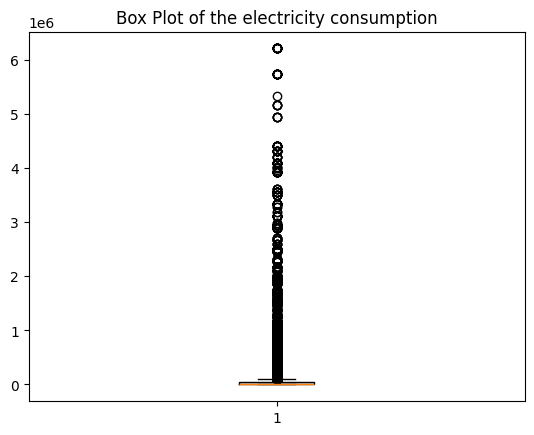

In [11]:
#I am plotting a graph
plt.boxplot(electricity_consumption)

#setting the title of the plot
plt.title('Box Plot of the electricity consumption')

#Accessing the visualization 
plt.show()

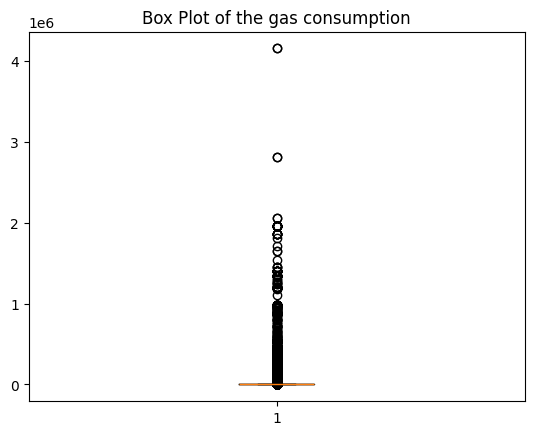

In [12]:
#I am plotting a graph
plt.boxplot(gas_consumption)

#setting the title of the plot
plt.title('Box Plot of the gas consumption')

#Accessing the visualization 
plt.show()

Central Tendency: The median gas consumption is very low, close to zero.

Spread: The interquartile range (IQR) is small, suggesting that the middle 50% of the data points are close in value and near the lower end of the scale.

Outliers: There are multiple outliers above the upper whisker, with two particularly extreme values far above the rest, indicating instances of unusually high gas consumption. 
.

## conclusion
I will assume that the outliers were not due to errors and were true observations.Therefore i decided to keep them in my analysis

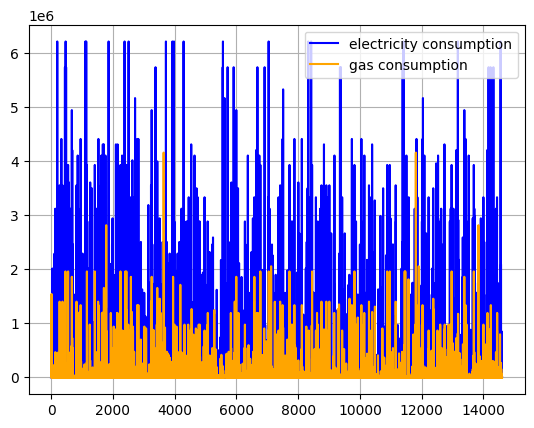

In [14]:
#plot line graph to compare the two consumptions
plt.plot(electricity_consumption.index,electricity_consumption, label='electricity consumption',color='Blue')
plt.plot(gas_consumption.index,gas_consumption, label='gas consumption',color='Orange')
plt.xlabel='cons_last_month'
plt.ylabel='Consumption'
plt.title='Comparision between consumption of gas and electricity'
plt.legend()
plt.grid(True)
#showing the plot
plt.show()

In [15]:
def stacked_plot_bar(dataframe,title_,size_=(18,10),rot_=0,legend_='upper right'):
    """
    plot stacked bars with annotations
    """
    ax= dataframe.plot(
        kind='bar',
        title=title_,
        rot=rot_,
        figsize=size_,
        stacked=True
    )

    #Annotate bars
    annotate_stacked_bar=(ax)
    #rename legend
    plt.legend(['Retention','Churn'], loc=legend_)
    #labels for the graph
    plt.ylabel("Company base(%)") 

    plt.show()
    

def annotate_stacked_bar(ax ,pad=0.99, textsize=13,colour='white'):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )
def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')


<function __main__.plot_distribution(dataframe, column, ax, bins_=50)>

# plotting the stacked_plot_bar

TypeError: 'str' object is not callable

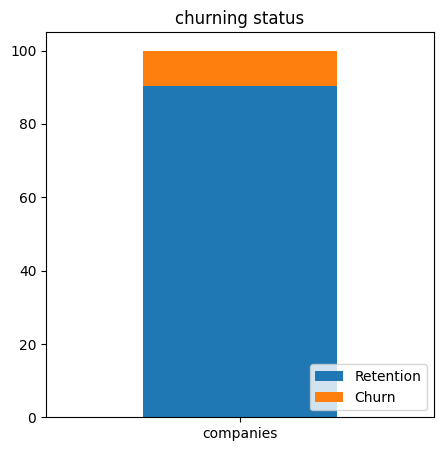

In [17]:
#we will create a variable know as churn to see which customers have left
churn=client_data[['id','churn']]
churn
churn.columns = ['companies','churn']
churn_total=churn.groupby(churn['churn']).count()
churn_percentage=churn_total/churn_total.sum()*100
stacked_plot_bar(churn_percentage.transpose(), 'churning status',(5,5),legend_='lower right')

<function matplotlib.pyplot.show(close=None, block=None)>

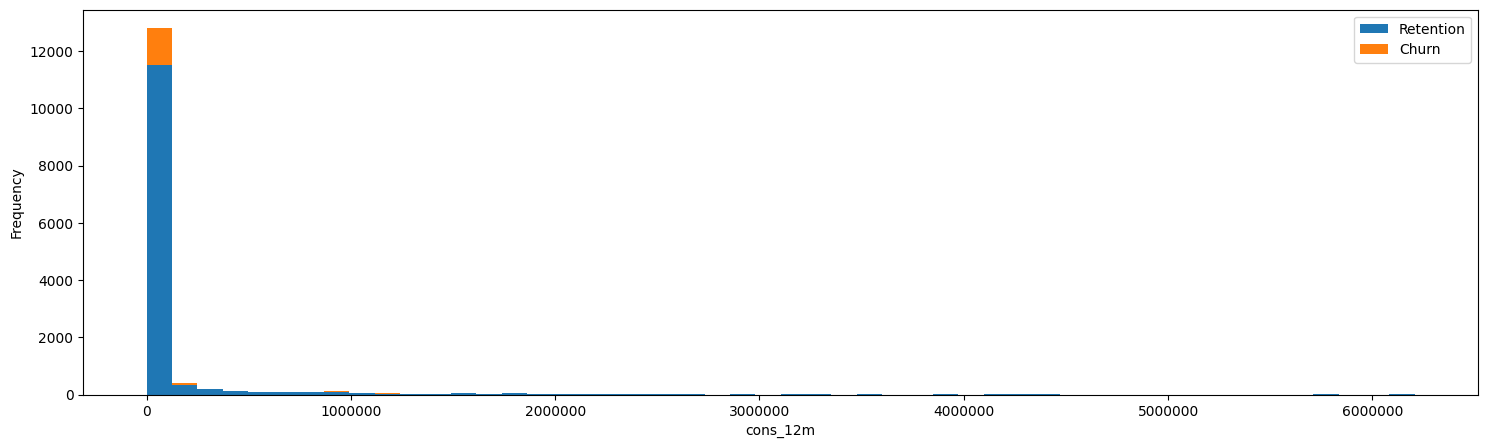

In [18]:
#comparing consumption of cons_12m with the a variable containing all the columns
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

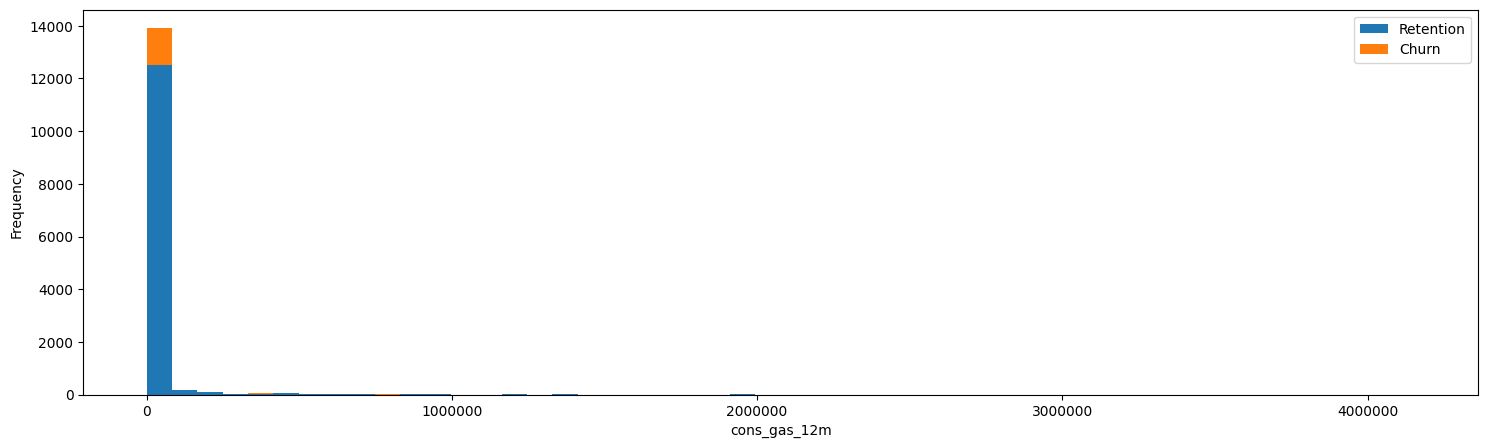

In [19]:
#comparing consumption of cons_12m with the a variable containing all the columns
consumption = client_data[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_gas_12m', axs)
plt.show

This is just but a test